<a href="https://colab.research.google.com/github/yumnazakkiya/DQLAB_DATA_ANALYST/blob/main/Sesi16/Hands_on_%26_Quiz_Model_Klasifikasi_Sederhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ini cara import package


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve, LeaveOneOut, train_test_split, cross_val_score, KFold, cross_validate
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay

# Load Data Iris

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=iris_df)

https://docs.google.com/spreadsheets/d/1eOsRPbR5WR7z6YxQDQ2oXltXudq582lmM-pRi1F94pE/edit#gid=0


# EDA

<Axes: xlabel='target'>

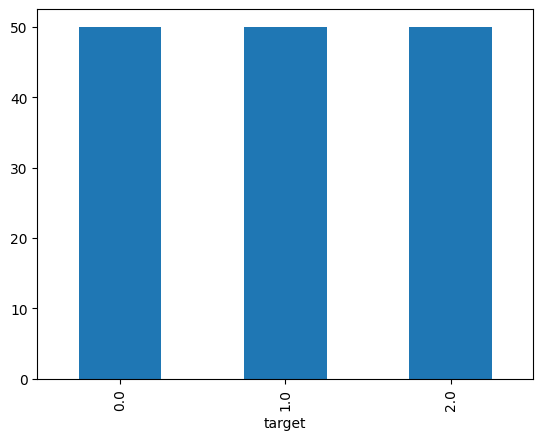

In [ ]:
jml_category = iris_df.target.value_counts()
jml_category.plot(kind='bar')

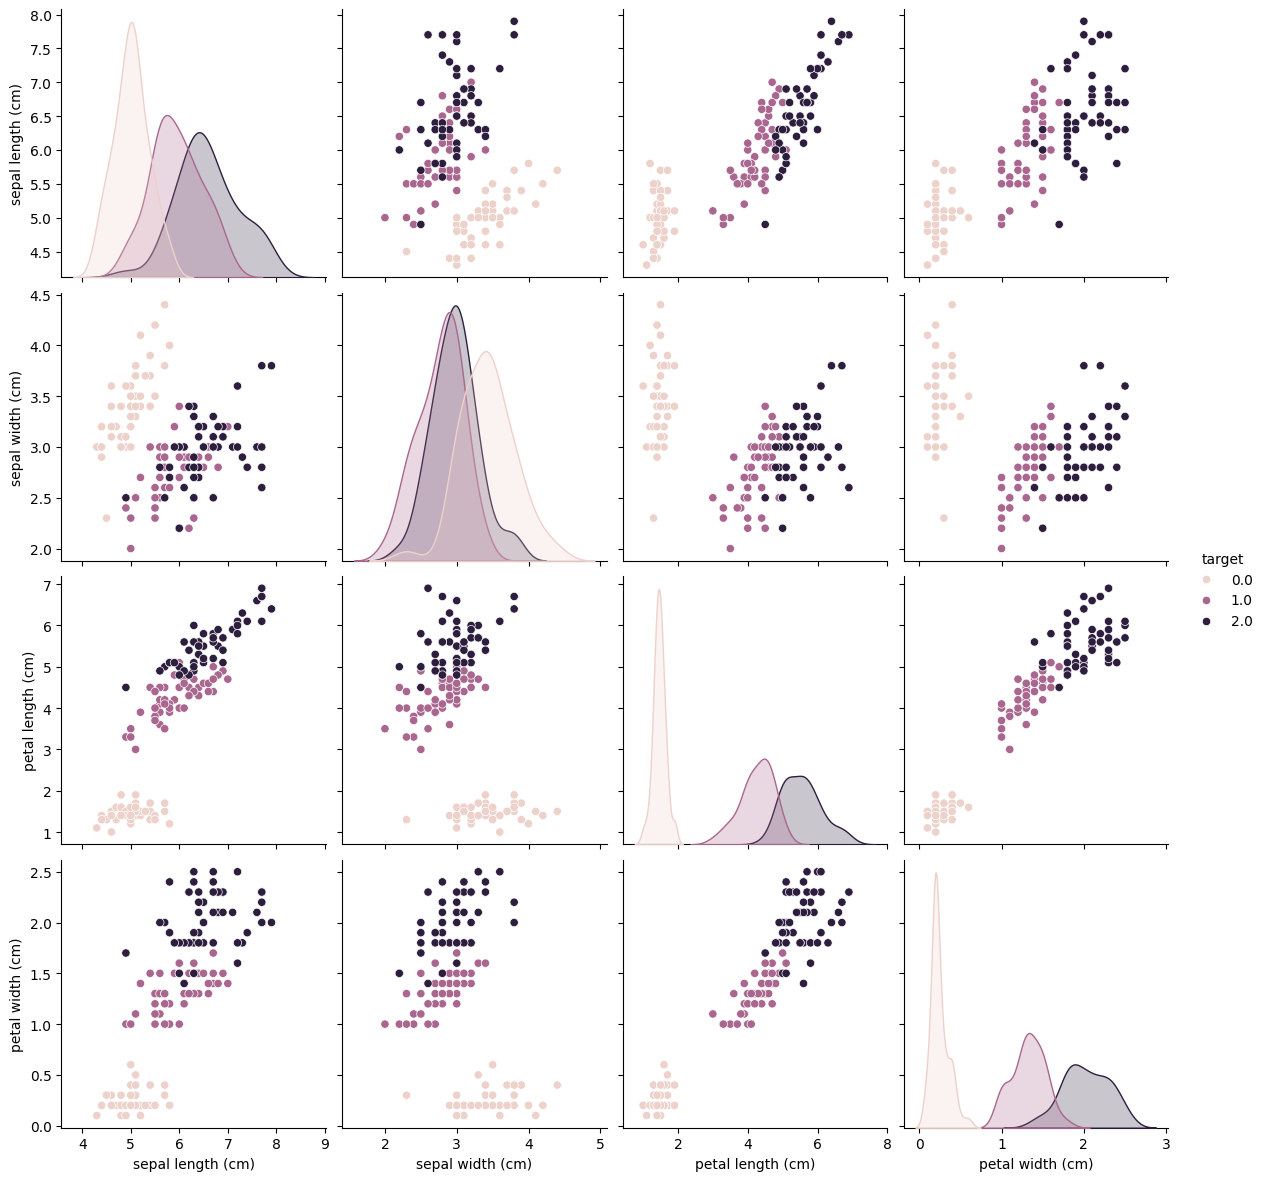

In [ ]:
sns.pairplot(iris_df, hue = "target", height = 3)
plt.show()

# Data Preprocessing
## Pemisahan Features (X) dan Target (Y)

In [ ]:
X = iris_df.drop(["target"], axis = 1)
y = iris_df["target"]
print(X.shape, y.shape)

(150, 4) (150,)


## Scaling Nilai Features (X)

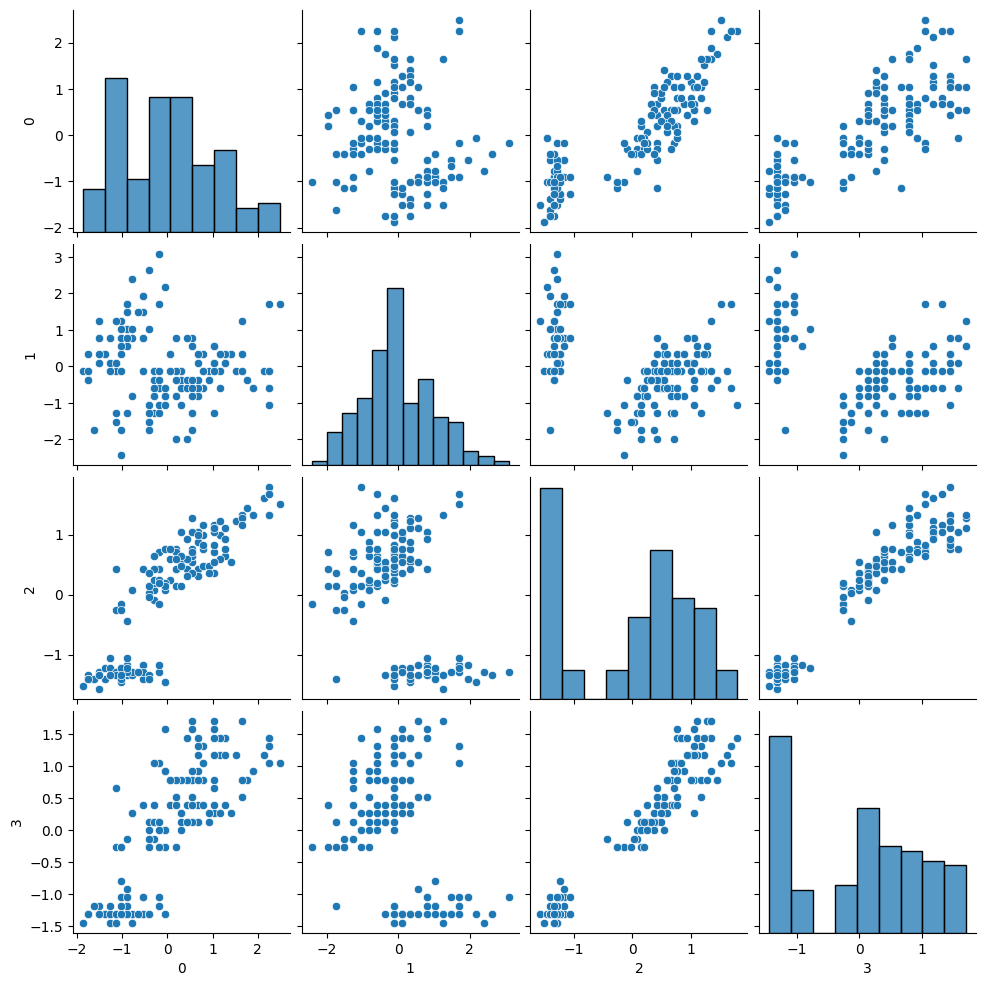

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
sns.pairplot(pd.DataFrame(X_scaled))

# Model Development


## Fitting Model
Proses fit model adalah proses yang dijalankan untuk menjalankan proses pembelajaran algoritma model kita terhadap data latih


### KNearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_scaled,y) # learning /training sudah selesai

KNeighborsClassifier()

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_scaled,y)

LogisticRegression()

In [ ]:
print ("Nilai koefisien model adalah :", lr.coef_)
print ("Nilai intercept model adalah :", lr.intercept_)

Nilai koefisien model adalah : [[-1.07659238  1.15977648 -1.92814138 -1.81227307]
 [ 0.5899243  -0.36263595 -0.36461312 -0.82700241]
 [ 0.48666809 -0.79714052  2.2927545   2.63927548]]
Nilai intercept model adalah : [-0.20463897  2.07455834 -1.86991938]


### Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

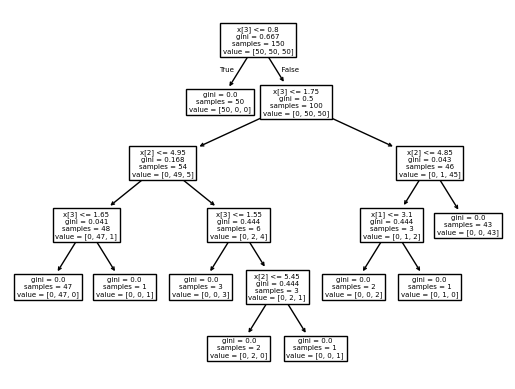

In [ ]:
plot_tree(dt)
plt.show()

## Evaluation Metrics

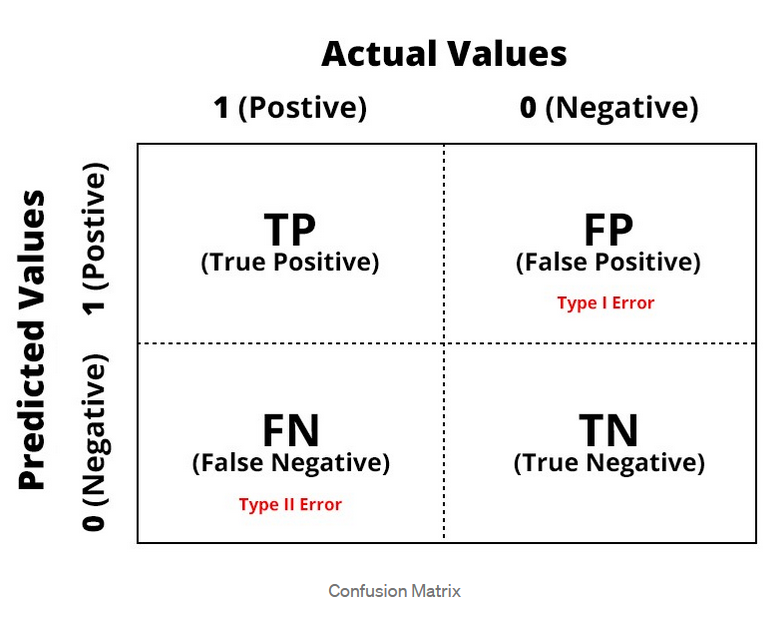


*   Accuracy = (TP+TN) / (TP+FP+FN+TN)
: menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar
*   Precision = (TP) / (TP + FP)
: menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model.
*   Recall  = TP / (TP + FN)
: menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi
*   F-1 Score  = (2 * Recall * Precision) / (Recall + Precision)
: menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan
*   Support  = jumlah kemunculan aktual dari kelas dari sebuah dataset

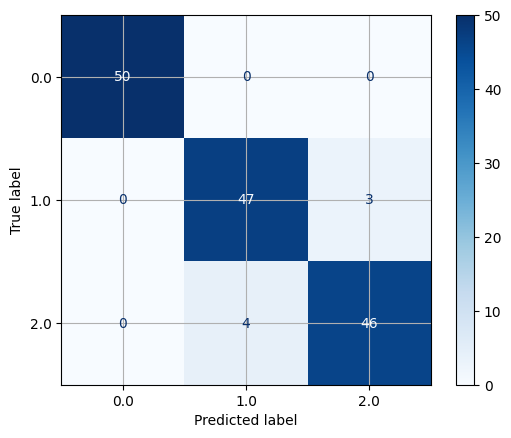

In [ ]:
# menggunakan model logress sebelumnya untuk memprediksi
predict = knn.predict(X_scaled)

cm_test = confusion_matrix(y, predict, labels=knn.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp_test.plot(cmap='Blues').ax_.grid()

In [ ]:
#Classification Report
print(classification_report(y, predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.92      0.94      0.93        50
         2.0       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



- Accuracy Score lebih tepat digunakan untuk data yang cenderung "balance". Keuntungan tambahan adalah memudahkan penjelasan kepada stakeholder mengenai performa model. Accuracy score juga dapat digunakan ketika data feature dianggap penting semua.
- F1-score dapat digunakan pada permodelan klasifikasi biner (binary classification) dan ketika dataset yang digunakan cenderung imbalance.

### Quiz: Coba Evaluasi Model dengan Algorithma Classification yang lain

## Evaluation / Validation Methods
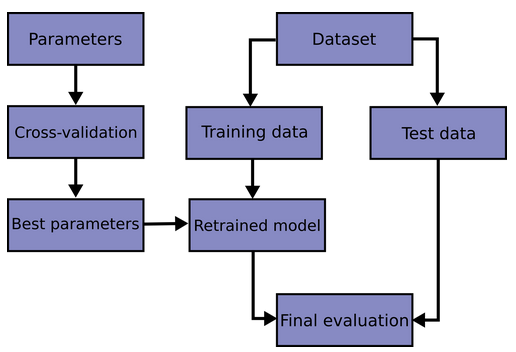

**Mengapa kita membagi data menjadi Train, Validation, dan Test?**

Kekhawatiran utama pada saat mendevelop sebuah model machine learning adalah model tidak dapat tergeneralisasi secara baik saat model digunakan untuk memprediksi data-data baru (unseen data). Kita tidak ingin model yang kita bangun memiliki performa yang baik saat dilatih namun level performa itu tidak dapat dicapai saat model dideploy untuk memprediksi data baru.

Untuk menilai generalisasi model machine learning, kita perlu membedakan antara dataset yang kita gunakan untuk melatih model machine learning dan dataset yang kita anggap unseen data baru untuk mengevaluasi performa model yang kita latih. Sehingga kita harus membagi antara dataset menjadi train dan test data:

*   Train Dataset : sekumpulan data yang digunakan untuk melatih model machine learning kita.
*   Test Dataset : sekumpulan data yang digunakan untuk melakukan evaluasi dari model final yang sudah dilatih sebelumnya.

Agar evaluasi performa model machine learning dapat kita andalkan, kita anggap test data adalah data baru dan perlu dipisahkan sepenuhnya dari seluruh proses training sampai model selesai dibangun. Namun pada saat proses training, kita pun membutuhkan data yang terpisah dari data yang digunakan untuk training model untuk mengevaluasi performa suatu algoritma machine learning sehingga dapat dibandingkan dengan algoritma yang lainnya (refer ke isu generalisasi). Maka dari itu, data training yang sebelumnya telah disiapkan dapat dipotong kembali menjadi dataset yang kita sebut validation set.

*   Validation Dataset : sekumpulan data yang digunakan untuk memberikan evaluasi dari model yang kita bangun saat melakukan pemilihan model dan tuning hyperparameter. Bisa juga digunakan untuk melakukan model preparation seperti feature selection.

### Hold Out (Split Data Training dan Testing)
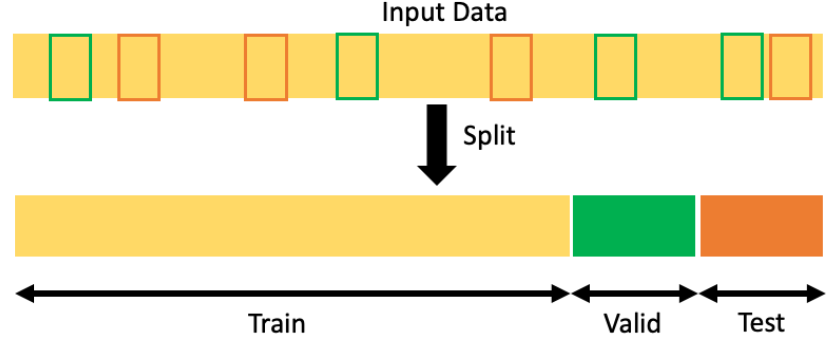

Berapa proporsi yang ideal untuk melakukan splitting data? Hal tersebut dapat bergantung pada 2 hal yaitu :
1.   Total sampel data yang kita punya;
2.   Model yang ingin kita bangun.


Pertimbangan :
*   Beberapa model membutuhkan train dataset dalam jumlah yang cukup signifikan, maka dibutuhkan proporsi train dataset yang besar.
*   Model dengan hyperparameter yang sedikit cukup mudah untuk dilakukan tuning dan validasi, jadi kemungkinan proporsi validation dataset dapat dikurangi dan sebaliknya jika model mempunyai hyperparameter yang cukup banyak, maka validation dataset dapat ditingkatkan proporsinya.

Jika kita menggunakan pendekatan hold out, pembagian data validasi bersifat optional karena data test yang sudah kita pisahkan dapat digunakan untuk proses validasi model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, stratify = y, random_state = 42)
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (105, 4) Y (105,)
Data Test: X (45, 4) Y (45,)


proses validasi dengan metode hold out
#### KNN

In [ ]:
# Proses training model
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# evaluasi performa model pada data training
y_pred = knn.predict(X_train)
acc_score = accuracy_score(y_train, y_pred)
print('Performa Training:', acc_score)

Performa Training: 0.9809523809523809


In [ ]:
# evaluasi performa model pada data testing
y_pred = knn.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print('Performa Testing:', acc_score)

Performa Testing: 0.9111111111111111


#### Multiple at Once

In [ ]:
models = {'LR':LogisticRegression(),
          "DT": DecisionTreeClassifier(),
          'KNN': KNeighborsClassifier(),
          }

for name, model in models.items():
  # fit model pada data training
  model.fit(X_train,y_train)

  # hitung metric performa training
  prediction = model.predict(X_train)
  score = accuracy_score(y_train, prediction)
  print ("Accuracy",name, "Training : ", score)

  # hitung metric performa testing
  prediction = model.predict(X_test)
  score = accuracy_score(y_test, prediction)
  print ("Accuracy",name, "Testing : ", score)

Accuracy LR Training :  0.9809523809523809
Accuracy LR Testing :  0.9111111111111111
Accuracy DT Training :  1.0
Accuracy DT Testing :  0.9777777777777777
Accuracy KNN Training :  0.9809523809523809
Accuracy KNN Testing :  0.9111111111111111


### Bootstrap Cross Validation

In [ ]:
#Lets run Bootstrap
n_iterations = 10
n_size = int(X_scaled.shape[0]*0.7)
stats = list()
full_df = pd.concat([pd.DataFrame(X_scaled),pd.Series(y)], axis = 1).values
for i in range(n_iterations):
    #prepare train & test sets
    boot_train = resample(full_df, n_samples = n_size) #Sampling with replacement..whichever is not used in training data will be used in test data
    boot_test = np.array([x for x in full_df if x.tolist() not in boot_train.tolist()]) #picking rest of the data not considered in training sample

    #fit model
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(boot_train[:,:-1], boot_train[:,-1])

    #evaluate model
    predictions = model.predict(boot_test[:,:-1])
    score = accuracy_score(boot_test[:,-1], predictions)
    print('Iteration:', str(i), 'Score:', str(score))
    stats.append(score)

Iteration: 0 Score: 0.9583333333333334
Iteration: 1 Score: 0.958904109589041
Iteration: 2 Score: 0.971830985915493
Iteration: 3 Score: 0.971830985915493
Iteration: 4 Score: 0.9428571428571428
Iteration: 5 Score: 0.9493670886075949
Iteration: 6 Score: 0.9565217391304348
Iteration: 7 Score: 0.9054054054054054
Iteration: 8 Score: 0.9552238805970149
Iteration: 9 Score: 0.9866666666666667


### K-Fold Cross Validation

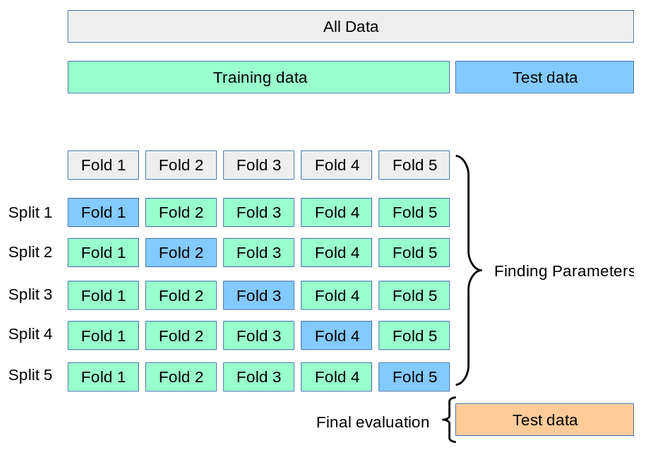

KFold cross validation akan membagi train dataset dan test dataset menjadi beberapa sample group (biasa disebut fold) dengan ukuran proporsi data yang sama lalu dilakukan iterasi untuk mentrain model dan menilai performa model hasil training. Setiap iterasi training, digunakan dataset train dan validasi yang berbeda sehingga memberikan indikasi yang lebih baik atas kemampuan model dalam bekerja pada data yang baru.

Jika dibandingkan dengan metode hold out yang bergantung pada satu kali split, indikasi performa model dengan KFold dapat lebih dipercaya karena Kfold tidak tergantung pada bagaimana data training displit menjadi data train dan data validasi. Namun, Kfold memerlukan lebih banyak computational power and time untuk dilakukan karena harus melatih model beberapa kali, dibandingkan dengan metode holdout.

In [ ]:
folds = KFold(n_splits = 15, shuffle = True, random_state = 100)
scores_kfold = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=folds)
print ("Accuracy K-Fold : ", np.average(scores_kfold), 'STD:', np.std(scores_kfold))

Accuracy K-Fold :  0.9523809523809523 STD: 0.08518354199999201


# Quiz

Silahkan coba beberapa algoritma klasifikasi lain, bandingkan performa modelnya. Mana algortima yang menghasilkan model yang paling tinggi performa (akurasi) nya

algoritma yang dapat dicoba:
- LogisticRegression
- RadiusNeighborsClassifier
- GaussianNB
- SVC
- QuadraticDiscriminantAnalysis
- RandomForestClassifier
- AdaBoostClassifier
- ExtraTreesClassifier
- BaggingClassifier
- GradientBoostingClassifier

In [ ]:
models = {'LR': LogisticRegression(),
          'RNN': RadiusNeighborsClassifier(),
          'NB': GaussianNB(),
          'SVC': SVC(),
          'QDA': QuadraticDiscriminantAnalysis(),
          'ADA': AdaBoostClassifier(),
          'ExT': ExtraTreesClassifier(),
          'Bag': BaggingClassifier(),
          'GBC' :GradientBoostingClassifier()}